### Logistic Regression Work
- Address Class Imbalance with Oversampling
- Cross Validation of of oversampling approach
- Chart Top Features for logistic regression 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from ipywidgets import interactive, FloatSlider

import imblearn.over_sampling

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve 

%matplotlib inline

In [2]:
data = pd.read_csv('/Users/jennihawk/Documents/Data Science/Classification/Churn Project/Models/chatr_clean.csv')

In [3]:
data.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,InternetService_Fiber,InternetService_No,Contract_One_Year,Contract_Two_year,PaymentMethod_Crcard,...,DeviceProtection_No_internet_serv,DeviceProtection_Yes,TechSupport_No_internet_serv,TechSupport_Yes,StreamingTV_No_internet_serv,StreamingTV_Yes,StreamingMovies_No_internet_serv,StreamingMovies_Yes,PaperlessBilling_Yes,Churn_Yes
0,7590-VHVEG,0,1.0,29.85,29.85,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,5575-GNVDE,0,34.0,56.95,1889.50,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3668-QPYBK,0,2.0,53.85,108.15,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,7795-CFOCW,0,45.0,42.30,1840.75,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
4,9237-HQITU,0,2.0,70.70,151.65,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [4]:
#data.info()

In [5]:
data.columns

Index(['customerID', 'SeniorCitizen', 'tenure', 'MonthlyCharges',
       'TotalCharges', 'InternetService_Fiber', 'InternetService_No',
       'Contract_One_Year', 'Contract_Two_year', 'PaymentMethod_Crcard',
       'PaymentMethod_Electr_Check', 'PaymentMethod_Mailed_check',
       'MultipleLines_No_phone_serv', 'MultipleLines_Yes', 'Dependents_Yes',
       'gender_Male', 'Partner_Yes', 'PhoneService_Yes',
       'OnlineSecurity_No_internet_serv', 'OnlineSecurity_Yes',
       'OnlineBackup_No_Internet_Serv', 'OnlineBackup_Yes',
       'DeviceProtection_No_internet_serv', 'DeviceProtection_Yes',
       'TechSupport_No_internet_serv', 'TechSupport_Yes',
       'StreamingTV_No_internet_serv', 'StreamingTV_Yes',
       'StreamingMovies_No_internet_serv', 'StreamingMovies_Yes',
       'PaperlessBilling_Yes', 'Churn_Yes'],
      dtype='object')

### Model Setup

In [6]:
features_in = ['SeniorCitizen', 'tenure', 'MonthlyCharges',
       'TotalCharges', 'InternetService_Fiber', 'InternetService_No',
       'Contract_One_Year', 'Contract_Two_year', 'PaymentMethod_Crcard',
       'PaymentMethod_Electr_Check', 'PaymentMethod_Mailed_check',
       'MultipleLines_No_phone_serv', 'MultipleLines_Yes', 'Dependents_Yes',
       'gender_Male', 'Partner_Yes', 'PhoneService_Yes',
       'OnlineSecurity_No_internet_serv', 'OnlineSecurity_Yes',
       'OnlineBackup_No_Internet_Serv', 'OnlineBackup_Yes',
       'DeviceProtection_No_internet_serv', 'DeviceProtection_Yes',
       'TechSupport_No_internet_serv', 'TechSupport_Yes',
       'StreamingTV_No_internet_serv', 'StreamingTV_Yes',
       'StreamingMovies_No_internet_serv', 'StreamingMovies_Yes',
       'PaperlessBilling_Yes']

y = data['Churn_Yes']
X = data[features_in]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

pipe = Pipeline([('scaler', StandardScaler()), ('LogReg', LogisticRegression())])

In [7]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5274, 30)
(1758, 30)
(5274,)
(1758,)


### Fit Logistic Regression to Training Data

In [8]:
pipe.fit(X_train, y_train)  # applies scaling on training data

Pipeline(steps=[('scaler', StandardScaler()), ('LogReg', LogisticRegression())])

### Class Imbalance
- Average Rate of Churn on Data
- Class Imbalance Since I don't have 50% average churn - there's a class imbalance

In [9]:
np.mean(y_train)

0.26753886992794845

In [10]:
np.mean(y_test)

0.2605233219567691

#### Hard Class Predictions (No Oversample Train Data)
Predict Churn / Not Churn

In [11]:
y_pred = pipe.predict(X_test)

#### Results for No Oversample Train Data


In [12]:
print("Default treshold:")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1: {f1_score(y_test, y_pred)}")

Default treshold:
Precision: 0.6139896373056994
Recall: 0.517467248908297
F1: 0.5616113744075829


#### Setup Oversampling

In [13]:
# setup for the ratio argument of RandomOverSampler initialization
n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)
ratio = {1 : n_pos * 4, 0 : n_neg} 

# randomly oversample positive samples: create 4x as many 
ROS = imblearn.over_sampling.RandomOverSampler(sampling_strategy = ratio, random_state=42) 

#use the fit_sample method to create the dataset with a desired proportion
#the variables X_tr_rs, y_tr_rs hold the training data with the extra samples we just created
X_tr_oversample, y_tr_oversample = ROS.fit_resample(X_train, y_train)


/opt/anaconda3/lib/python3.9/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (5644) in class 1 will be larger than the number of samples in the majority class (class #0 -> 3863)
  warnings.warn(


#### Setup up Oversample model 

In [14]:
pipe_oversample = Pipeline([('scaler', StandardScaler()), ('LogReg', LogisticRegression())])

In [15]:
pipe_oversample.fit(X_tr_oversample, y_tr_oversample)

Pipeline(steps=[('scaler', StandardScaler()), ('LogReg', LogisticRegression())])

#### Hard Class Predictions for Oversample Train Data

In [16]:
#we keep same X_test
y_pred_oversample = pipe_oversample.predict(X_test)

#### Results on Oversampled Train Data

In [17]:
print("Default treshold:")
print(f"Precision: {precision_score(y_test, y_pred_oversample)}")
print(f"Recall: {recall_score(y_test, y_pred_oversample)}")
print(f"F1: {f1_score(y_test, y_pred_oversample)}")

Default treshold:
Precision: 0.46162927981109797
Recall: 0.8537117903930131
F1: 0.5992337164750958


### Below is work on no oversample data

#### Soft Class Predictions
- Giving probabilities of being one class or another
- If class labels strings Sklearn displays in alphabetical order. If numerical class labels they'll be in ascending order

In [18]:
pipe.predict_proba(X_test)[:5]

array([[0.99479267, 0.00520733],
       [0.8773139 , 0.1226861 ],
       [0.30829241, 0.69170759],
       [0.88565903, 0.11434097],
       [0.63613899, 0.36386101]])

#### Accuracy
Percentage of observations that were correctly classified.
When one class is significantly less common that the other accuracy is often not the most helpful metric to optimize.

In [19]:
#accuracy score on train data
pipe.score(X_train, y_train)

0.8065984072810012

In [20]:
#accuracy score on test data
pipe.score(X_test, y_test)

0.7895335608646189

#### Confusion Matrix

In [21]:
#sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)

Get this to print out percentage option too

In [22]:
logreg_confusion = confusion_matrix(y_test, y_pred)

In [23]:
logreg_confusion

array([[1151,  149],
       [ 221,  237]])

In [24]:
def make_confusion_matrix(model, threshold = 0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_test)[:, 1] >= threshold)
    churn_conf = confusion_matrix(y_test, y_pred)
    plt.figure(dpi=80)
    sns.heatmap(churn_conf, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',);

    #plt.savefig('confusion_matrix.png', dpi=300) 

In [25]:
# confusion matrix with threshold slider
interactive(lambda threshold: make_confusion_matrix(pipe, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

In [26]:
def make_confusion_matrix(model, threshold = 0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_test)[:, 1] >= threshold)
    churn_conf = confusion_matrix(y_test, y_pred, normalize = 'all')
    plt.figure(dpi=80)
    sns.heatmap(churn_conf, cmap=plt.cm.Blues, annot=True, square=True, fmt='.2%');
    #plt.savefig('confusion_matrix_percent.png', dpi=300) 

In [27]:
# confusion matrix with threshold slider
# how the widget works https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html?highlight=interact
interactive(lambda threshold: make_confusion_matrix(pipe, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

Confusion matrix findings
The model:
- correctly classified 1151 people who didn't cancel their subscription. 
- correctly classified 237 customers as people who were going to cancel their subscription and did.
- incorrectly classified  149 customers as people who were going to cancel their subscription when they actually kept their subscription. 
- It incorrectly classified 221 customers as people who were going to keep their subscription but actually canceled it. 

### ROC Curve
- ROC AUC (area under curve) metric is 1 for a perfect classifier, and it's equal to 0.5 for a model that performs as well as random guess. 

How the variables below are working
- the variables (fpr, tpr, thresholds) are returned by the roc_curve function are stored in these three variables - fpr (false positive rate), tpr (true positive rate) and thresholds. Fpr and tpr are used later to plot the chart.

In [28]:
fpr, tpr, thresholds = roc_curve(y_test, pipe.predict_proba(X_test)[:,1])

ROC AUC score =  0.8344776620759153


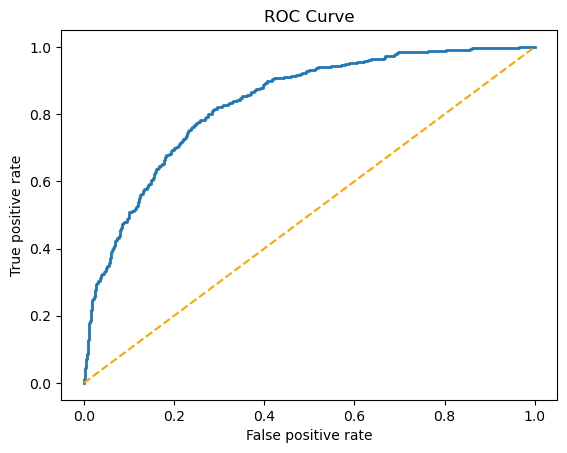

In [29]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='orange',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve');
print("ROC AUC score = ", roc_auc_score(y_test, pipe.predict_proba(X_test)[:,1]))
#plt.savefig('ROC Curve.png', dpi=300) 

### Interpreting Coefficients: Would like to indicate which features are more strongly associated with churn - we do this with coefficients, correct?
- One unit of increase in x actually increases the log odds by beta units. 
- In other words: One unit of increase in x, increases the odds by an exponential factor of beta.
- If the features coefficient beta is positive, increasing that feature makes the positive class more likely
- If beta is negative, increasing the feature does the opposite and the positive class becomes less likely

### Coefficient For Each Feature

#### Coeffcients in Log Odds Units

In [30]:
#.T to transform cuz there was a shape error
coefs_tst_data = pd.DataFrame(pipe['LogReg'].coef_.T, X.columns, columns = ['Coeff_Log_Odds'])

In [31]:
#coefs_tst_data.sort_values(by='Coeff_Log_Odds', ascending = False)

#### Coeffecients: Exponentiate to get rid of log odds
These are now odds NOT log odds

In [32]:
coefs_tst_data['Coeff_Odds'] = coefs_tst_data['Coeff_Log_Odds']

In [33]:
#coefs_tst_data

In [34]:
coefs_tst_data['Coeff_Odds'] = coefs_tst_data['Coeff_Odds'].apply(lambda x: np.exp(x))

In [35]:
coefs_tst_data.sort_values(by='Coeff_Odds', ascending = False)

,Coeff_Log_Odds,Coeff_Odds
TotalCharges,0.746655,2.109930
InternetService_Fiber,0.600124,1.822345
StreamingMovies_Yes,0.195780,1.216259
StreamingTV_Yes,0.173457,1.189409
MultipleLines_Yes,0.131167,1.140158
PaymentMethod_Electr_Check,0.123118,1.131018
PaperlessBilling_Yes,0.114826,1.121679
SeniorCitizen,0.090125,1.094311
Partner_Yes,0.047038,1.048162
MultipleLines_No_phone_serv,0.042894,1.043827


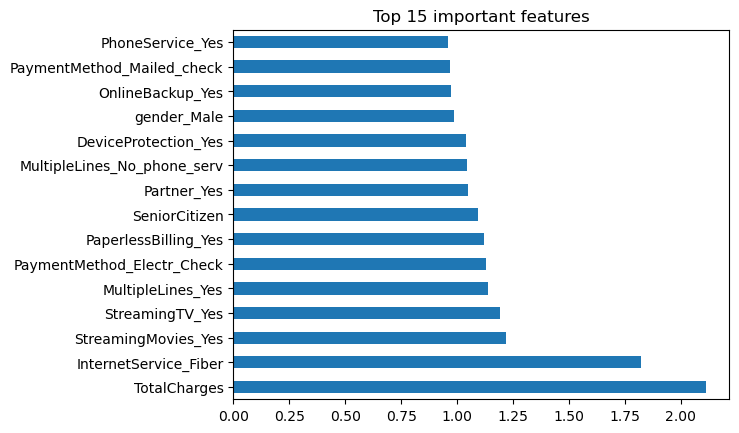

In [36]:
feat_importances = pd.Series(coefs_tst_data.Coeff_Odds, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.title("Top 15 important features")
#plt.savefig("LogReg_FeaturesImg.png", format="png", dpi=300)
plt.show()

In [37]:
#pipe['LogReg'].coef_

In [38]:
#np.exp(pipe['LogReg'].coef_)

In [39]:
#type(pipe['LogReg'])